In [1]:
import numpy as np
import pandas as pd

from skimage import color
from skimage import io

import matplotlib.pyplot as plt
import seaborn as sns

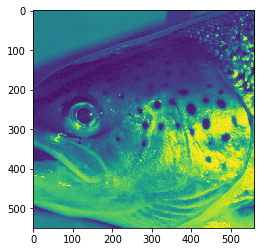

In [2]:
img_1707cs = io.imread('train/1707cs.jpg', as_gray=True)
img_crop = img_1707cs[350:900, 180:740]
plt.imshow(img_crop)

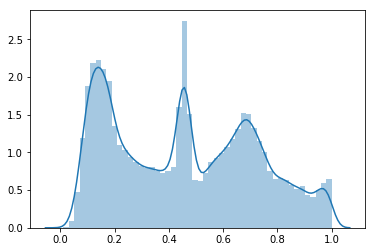

In [3]:
sns.distplot(img_crop.reshape(-1, 1))

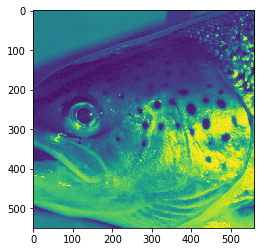

In [4]:
plt.imshow(img_crop)

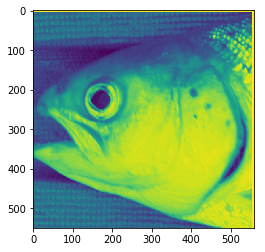

In [5]:
img_before = io.imread('ROIs/1722b.JPG', as_gray=True)
img_b_crop = img_before[350:900, 180:740]
plt.imshow(img_b_crop)

In [6]:
from skimage.feature import shape_index

In [7]:
img_b_crop.shape

(550, 560)

/Users/mingchen/anaconda3/envs/py36/lib/python3.6/site-packages/skimage/feature/corner.py:421: RuntimeWarning: invalid value encountered in true_divide
  return (2.0 / np.pi) * np.arctan((l2 + l1) / (l2 - l1))


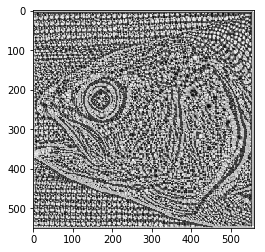

In [8]:
s = shape_index(img_b_crop)
plt.imshow(s, cmap=plt.cm.gray)

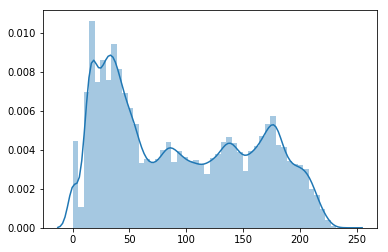

In [28]:
sns.distplot(img_b_crop.reshape(-1, 1))

In [3]:
seed_pt = (25, 25)
fill_color = 0
mask = np.zeros_like(img_1707cs)

In [4]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
for th in range(60, 120):
    prev_mask = mask.copy()
    mask = cv2.threshold(img_1707cs, th, 255, cv2.THRESH_BINARY)[1]
    mask = cv2.floodFill(mask, None, seed_pt, fill_color)[1]
    mask = cv2.bitwise_or(mask, prev_mask)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

n_centers = cv2.connectedComponents(mask)[0] - 1
print('There are %d cells in the image.'%n_centers)

There are 388 cells in the image.


In [5]:
import matplotlib.pyplot as plt

In [6]:
img_1707cs.shape

(1300, 900)

In [7]:
img_1707cs.shape[1:]

(900,)

In [8]:
img_df = pd.DataFrame(img_1707cs)

In [9]:
plt.imshow(img_1707cs[580:620, 560:600])

In [10]:
pd.DataFrame(img_1707cs[580:620, 560:600]).head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,138,128,122,124,127,125,121,119,110,111,...,123,122,119,112,107,107,112,115,112,108
1,138,127,119,120,123,120,115,112,107,108,...,122,121,122,114,106,107,113,116,111,105
2,136,124,115,117,120,118,112,108,103,104,...,124,123,123,117,111,110,114,117,117,115
3,135,123,114,116,121,119,113,108,101,102,...,128,127,122,119,116,114,115,120,127,131
4,127,130,128,121,115,113,110,107,104,91,...,120,119,130,128,127,125,124,125,125,126


In [11]:
import seaborn as sns

In [12]:
sns.heatmap(img_1707cs[580:620, 560:600])

In [13]:
img_1707cs = cv2.imread('train/1707cs.jpg', 0)
sns.heatmap(255 - img_1707cs[310:960, 155:745])

In [15]:
img = 255 - img_1707cs[310:960, 155:745]
sns.heatmap(img)

In [20]:
img = 255 - img_1707cs[310:960, 155:745]
img[img < 180] = 0 
sns.heatmap(img)

In [21]:
from scipy import ndimage as ndi
from skimage.feature import shape_index
from skimage.draw import circle

In [22]:
image = img
s = shape_index(image)

/Users/mingchen/anaconda3/envs/py36/lib/python3.6/site-packages/skimage/feature/corner.py:421: RuntimeWarning: divide by zero encountered in true_divide
  return (2.0 / np.pi) * np.arctan((l2 + l1) / (l2 - l1))
/Users/mingchen/anaconda3/envs/py36/lib/python3.6/site-packages/skimage/feature/corner.py:421: RuntimeWarning: invalid value encountered in true_divide
  return (2.0 / np.pi) * np.arctan((l2 + l1) / (l2 - l1))


In [24]:
target = 1
delta = 0.05

point_y, point_x = np.where(np.abs(s - target) < delta)
point_z = image[point_y, point_x]

# The shape index map relentlessly produces the shape, even that of noise.
# In order to reduce the impact of noise, we apply a Gaussian filter to it,
# and show the results once in

s_smooth = ndi.gaussian_filter(s, sigma=0.5)

point_y_s, point_x_s = np.where(np.abs(s_smooth - target) < delta)
point_z_s = image[point_y_s, point_x_s]


fig = plt.figure(figsize=(24, 8))
ax1 = fig.add_subplot(1, 3, 1)

ax1.imshow(image, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('Input image', fontsize=18)

scatter_settings = dict(alpha=0.75, s=10, linewidths=0)

ax1.scatter(point_x, point_y, color='blue', **scatter_settings)
ax1.scatter(point_x_s, point_y_s, color='green', **scatter_settings)



ax3 = fig.add_subplot(1, 3, 3, sharex=ax1, sharey=ax1)

ax3.imshow(s, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Shape index, $\sigma=1$', fontsize=18)

fig.tight_layout()

plt.show()

/Users/mingchen/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.
/Users/mingchen/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less
  del sys.path[0]


/Users/mingchen/anaconda3/envs/py36/lib/python3.6/site-packages/skimage/feature/corner.py:373: RuntimeWarning: divide by zero encountered in true_divide
  return (2.0 / np.pi) * np.arctan((l2 + l1) / (l2 - l1))
/Users/mingchen/anaconda3/envs/py36/lib/python3.6/site-packages/skimage/feature/corner.py:373: RuntimeWarning: invalid value encountered in true_divide
  return (2.0 / np.pi) * np.arctan((l2 + l1) / (l2 - l1))


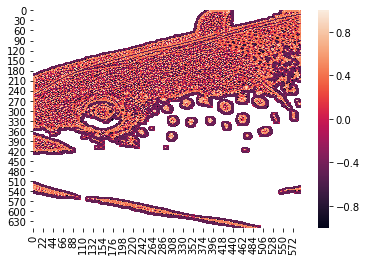

In [102]:
sns.heatmap(shape_index(img, sigma=1))

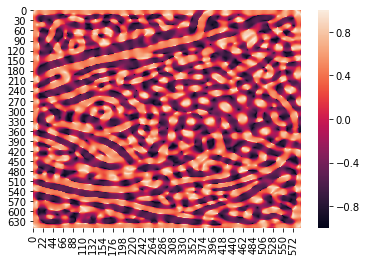

In [99]:
img1 = shape_index(255 - img_1707cs[310:960, 155:745], sigma=1)
sns.heatmap(shape_index(img1, sigma=10))